#  Creating single layer Autoencoder using MNIST and ANN

In [1]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

Using TensorFlow backend.
c:\users\boltuzamaki\anaconda3\envs\pose\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\boltuzamaki\anaconda3\envs\pose\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\boltuzamaki\anaconda3\envs\pose\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\boltuzamaki\anaconda3\e

In [2]:
# Preprocessing/ reshaping input images

(X_train, _), (X_test, _) = mnist.load_data()                        # Loading data from mnist

X_train = X_train.astype('float32')/255                              # normalizing the data for fast training
X_test = X_test.astype('float32')/255

X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))  # Reshape to flat from 2-D image array     
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [3]:
input_img= Input(shape=(784,))     # Converting to input image into keras tensor
input_img.shape

TensorShape([Dimension(None), Dimension(784)])

In [4]:
encoded = Dense(units = 32, activation = 'relu')(input_img)              # Encoder layer

In [5]:
decoded = Dense(units= 784, activation = 'sigmoid')(encoded)             # Decoder layer

In [6]:
autoencoder = Model(input_img, decoded)                     # Creating autoencoder which is made of encoder and decoder

In [7]:
autoencoder.summary()  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [8]:
encoder = Model(input_img, encoded)                       # Creating autoencoder only

In [9]:
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [10]:
encoded_input = Input(shape=(32,))                        # All image is compressed into size 32 latent vector

In [11]:
decoder_layer = autoencoder.layers[-1]                    # Creting decoder layer 

In [12]:
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [13]:
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Comlpiling and fitting model
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy',metrics = ['accuracy'])

autoencoder.fit(X_train, X_train, epochs = 50, batch_size = 256, shuffle = True, validation_data = (X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 40s 670us/step - loss: 0.3593 - acc: 0.7528 - val_loss: 0.2709 - val_acc: 0.7942
Epoch 2/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.2631 - acc: 0.7979 - val_loss: 0.2515 - val_acc: 0.7979
Epoch 3/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.2414 - acc: 0.7974 - val_loss: 0.2295 - val_acc: 0.7958
Epoch 4/50
60000/60000 [==============================] - 1s 22us/step - loss: 0.2224 - acc: 0.7972 - val_loss: 0.2127 - val_acc: 0.7962
Epoch 5/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.2076 - acc: 0.7984 - val_loss: 0.2000 - val_acc: 0.7988
Epoch 6/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.1965 - acc: 0.7996 - val_loss: 0.1904 - val_acc: 0.7998
Epoch 7/50
60000/60000 [==============================] - 1s 22us/step - loss: 0.1879 - acc: 0.8007 - val_loss: 0.1827 - val_a

In [15]:
# Saving model and weights of autoencoder
model_json = autoencoder.to_json()
with open("simple_autoencoder_model", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
autoencoder.save_weights("simple_autoencoder_model.h5"),
print("Saved model to disk")

Saved model to disk


In [16]:
# Saving model and weights of encoder
model_json = encoder.to_json()
with open("simple_autoencoder_model_encoder_only", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
encoder.save_weights("simple_autoencoder_model_encoder_only.h5"),
print("Saved model to disk")

Saved model to disk


In [17]:
# Saving model and weights of decoder
model_json = decoder.to_json()
with open("simple_autoencoder_model_decoder_only", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
decoder.save_weights("simple_autoencoder_model_decoder_only.h5"),
print("Saved model to disk")

Saved model to disk


In [18]:
encoded_imgs = encoder.predict(X_test)                         # Passing image through encoder to create latent vector
predicted = autoencoder.predict(X_test)                        # Passing image through whole autoencoder
decoder_predict = decoder.predict(encoded_imgs)                # Pass the encoded value by encoder via decoder to check if it can generate mnist like image or not

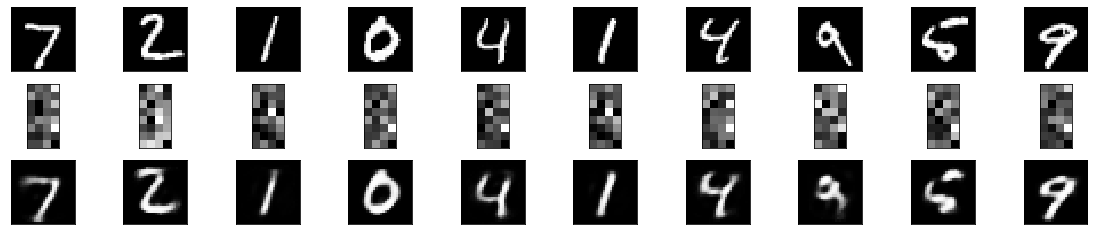

In [19]:
# Plotting figure 

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(decoder_predict[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
plt.show()

# First one is real image
# Second one is encoded latent vector
# Thir one is the image which decoder generated from encoded value